In [1]:
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state = 0)
from dash import Dash, html, dcc
import plotly.graph_objects as plotly
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State

# Data Collection:
Obtain the dataset from TechElectro Inc., containing customer information, purchase history, demographics, and preferences.

In [2]:
# Set the random seed for reproducibility
random.seed(42)
# Initialize empty lists to store data
CustomerID = []
Age = []
Gender = []
MaritalStatus = []
AnnualIncome = []
TotalPurchases = []
PreferredCategory = []


In [3]:
# Generate data for 500 customers
for i in range(500):
    CustomerID.append(1001 + i)  # Generate unique CustomerID starting from 1001

    # Generate random age between 18 and 65
    Age.append(random.randint(18, 65))

    # Generate random gender (50% chance for Male, 50% chance for Female)
    Gender.append(random.choice(['Male', 'Female']))

    # Generate random marital status (33.3% chance for each)
    MaritalStatus.append(random.choice(['Married', 'Single', 'Divorced']))

    # Generate random annual income between 30000 and 100000 USD
    AnnualIncome.append(random.randint(30000, 100000))

    # Generate random total purchases between 5 and 30
    TotalPurchases.append(random.randint(5, 30))

    # Generate random preferred category (50% chance for Electronics, 50% chance for Appliances)
    PreferredCategory.append(random.choice(['Electronics', 'Appliances']))


In [4]:
# Introduce some null values (10% of the dataset)
num_null_values = int(0.1 * len(CustomerID))
null_indices = random.sample(range(len(CustomerID)), num_null_values)
for index in null_indices:
    Age[index] = None
    TotalPurchases[index] = None

In [5]:
# Create duplicate CustomerIDs (5% of the dataset)
num_duplicates = int(0.05 * len(CustomerID))
duplicate_indices = random.sample(range(len(CustomerID)), num_duplicates)
for index in duplicate_indices:
    CustomerID.append(CustomerID[index])
    Age.append(Age[index])
    Gender.append(Gender[index])
    MaritalStatus.append(MaritalStatus[index])
    AnnualIncome.append(AnnualIncome[index])
    TotalPurchases.append(TotalPurchases[index])
    PreferredCategory.append(PreferredCategory[index])

In [6]:
# Create the DataFrame with the original dataset
data = {
    'CustomerID': CustomerID,
    'Age': Age,
    'Gender': Gender,
    'MaritalStatus': MaritalStatus,
    'AnnualIncome (USD)': AnnualIncome,
    'TotalPurchases': TotalPurchases,
    'PreferredCategory': PreferredCategory
}

In [7]:
df = pd.DataFrame(data)

In [8]:
# Create a new DataFrame by concatenating the original dataset with itself
df_extended = pd.concat([df, df], ignore_index=True)

In [9]:
# Display the first few rows of the extended dataset
print(df_extended.head())

   CustomerID   Age  Gender MaritalStatus  AnnualIncome (USD)  TotalPurchases  \
0        1001  58.0    Male       Married               66048            12.0   
1        1002  26.0    Male      Divorced               41395            23.0   
2        1003  20.0    Male       Married               58657            12.0   
3        1004  53.0    Male      Divorced               84987            12.0   
4        1005  55.0  Female       Married               50926            27.0   

  PreferredCategory  
0       Electronics  
1        Appliances  
2       Electronics  
3        Appliances  
4        Appliances  


# Data Cleaning: 
Clean the dataset by handling missing values, duplicates, and any inconsistencies.

In [10]:
df_extended.shape

(1050, 7)

In [11]:
df_extended.isnull().sum()

CustomerID              0
Age                   104
Gender                  0
MaritalStatus           0
AnnualIncome (USD)      0
TotalPurchases        104
PreferredCategory       0
dtype: int64

In [12]:
# Remove null values
df_extended = df_extended.dropna()

In [13]:
#sometimes we dont drop our duplicated values because some of
#our columns have only 2 values E.G Male and  Female
df_extended.duplicated().sum()

496

# Data Preprocessing:
Perform feature scaling, normalization, and encode categorical variables if needed.

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder


In [15]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
numeric_columns = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
df_extended[numeric_columns] = scaler.fit_transform(df_extended[numeric_columns])


In [16]:
# Normalization using MinMaxScaler (to scale between 0 and 1)
normalizer = MinMaxScaler()
df_extended[numeric_columns] = normalizer.fit_transform(df_extended[numeric_columns])


In [17]:
# Encode categorical variables using LabelEncoder and OneHotEncoder
le = LabelEncoder()
df_extended['Gender'] = le.fit_transform(df_extended['Gender'])
df_extended['MaritalStatus'] = le.fit_transform(df_extended['MaritalStatus'])


In [18]:
# Use OneHotEncoder for 'PreferredCategory' since it has more than two categories
ohe = OneHotEncoder(sparse=False)
preferred_category_encoded = ohe.fit_transform(df_extended[['PreferredCategory']])
preferred_category_encoded_df = pd.DataFrame(preferred_category_encoded, columns=ohe.get_feature_names_out(['PreferredCategory']))
df_encoded = pd.concat([df_extended.drop(['PreferredCategory'], axis=1), preferred_category_encoded_df], axis=1)


C:\Users\Syed Muqtasid Ali\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
# Display the first few rows of the preprocessed dataset
print(df_encoded.head())

   CustomerID       Age  Gender  MaritalStatus  AnnualIncome (USD)  \
0      1001.0  0.851064     1.0            1.0            0.510208   
1      1002.0  0.170213     1.0            0.0            0.154491   
2      1003.0  0.042553     1.0            1.0            0.403564   
3      1004.0  0.744681     1.0            0.0            0.783479   
4      1005.0  0.787234     0.0            1.0            0.292014   

   TotalPurchases  PreferredCategory_Appliances  PreferredCategory_Electronics  
0            0.28                           0.0                            1.0  
1            0.72                           1.0                            0.0  
2            0.28                           0.0                            1.0  
3            0.28                           1.0                            0.0  
4            0.88                           1.0                            0.0  


# Exploratory Data Analysis: 
Utilize Python libraries (e.g., Pandas, Matplotlib, Seaborn) to visualize and explore the data, uncovering patterns and insights about customer behavior.

In [20]:
# View the first few rows of the dataset
print(df_encoded.head())

   CustomerID       Age  Gender  MaritalStatus  AnnualIncome (USD)  \
0      1001.0  0.851064     1.0            1.0            0.510208   
1      1002.0  0.170213     1.0            0.0            0.154491   
2      1003.0  0.042553     1.0            1.0            0.403564   
3      1004.0  0.744681     1.0            0.0            0.783479   
4      1005.0  0.787234     0.0            1.0            0.292014   

   TotalPurchases  PreferredCategory_Appliances  PreferredCategory_Electronics  
0            0.28                           0.0                            1.0  
1            0.72                           1.0                            0.0  
2            0.28                           0.0                            1.0  
3            0.28                           1.0                            0.0  
4            0.88                           1.0                            0.0  


In [21]:
# Summary statistics
print(df_encoded.describe())

        CustomerID         Age      Gender  MaritalStatus  AnnualIncome (USD)  \
count   946.000000  946.000000  946.000000     946.000000          946.000000   
mean   1252.543340    0.536728    0.469345       1.000000            0.502417   
std     145.836782    0.297426    0.499323       0.822951            0.290891   
min    1001.000000    0.000000    0.000000       0.000000            0.000000   
25%    1127.000000    0.297872    0.000000       0.000000            0.240300   
50%    1249.000000    0.553191    0.000000       1.000000            0.524984   
75%    1379.000000    0.787234    1.000000       2.000000            0.758084   
max    1500.000000    1.000000    1.000000       2.000000            1.000000   

       TotalPurchases  PreferredCategory_Appliances  \
count      946.000000                    946.000000   
mean         0.510106                      0.532770   
std          0.303590                      0.499189   
min          0.000000                      0.00000

In [22]:
# Check for missing values
print(df_encoded.isnull().sum())

CustomerID                       99
Age                              99
Gender                           99
MaritalStatus                    99
AnnualIncome (USD)               99
TotalPurchases                   99
PreferredCategory_Appliances     99
PreferredCategory_Electronics    99
dtype: int64


In [23]:
# Count unique values in categorical variables
print(df_encoded['Gender'].value_counts())
print(df_encoded['MaritalStatus'].value_counts())
print(df_encoded['PreferredCategory_Appliances'].value_counts())
print(df_encoded['PreferredCategory_Electronics'].value_counts())

0.0    502
1.0    444
Name: Gender, dtype: int64
0.0    320
2.0    320
1.0    306
Name: MaritalStatus, dtype: int64
1.0    504
0.0    442
Name: PreferredCategory_Appliances, dtype: int64
0.0    504
1.0    442
Name: PreferredCategory_Electronics, dtype: int64


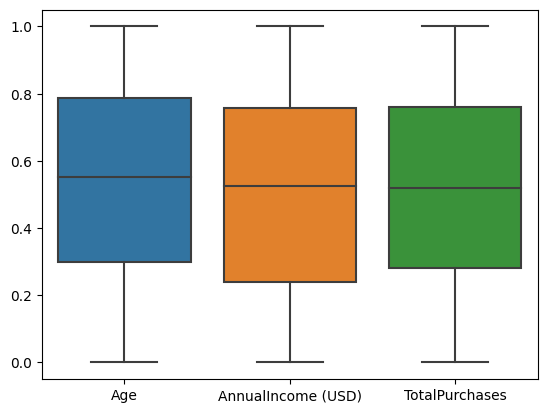

In [24]:
# Boxplot to visualize the distribution of numeric variables
sns.boxplot(data=df_encoded[numeric_columns])
plt.show()


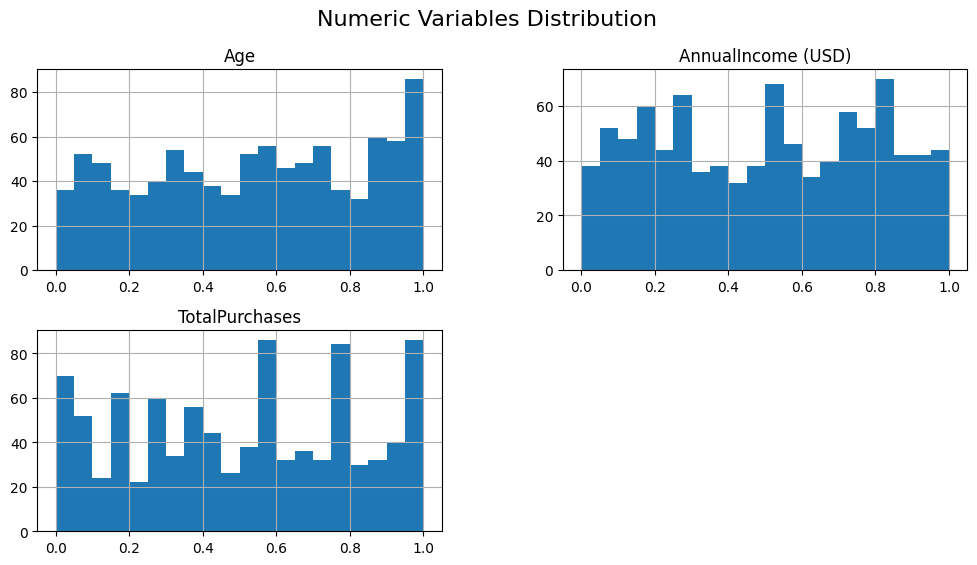

In [25]:
# Histogram to visualize the distribution of numeric variables
df_encoded[numeric_columns].hist(bins=20, figsize=(12, 6))
plt.suptitle('Numeric Variables Distribution', fontsize=16)
plt.show()

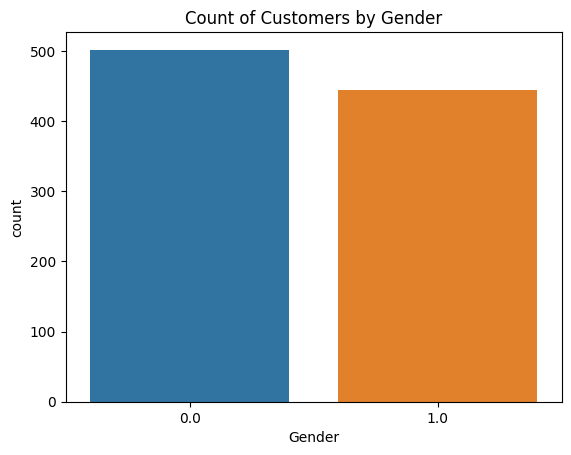

In [26]:
# Countplot to visualize the count of categorical variables
sns.countplot(x='Gender', data=df_encoded)
plt.title('Count of Customers by Gender')
plt.show()

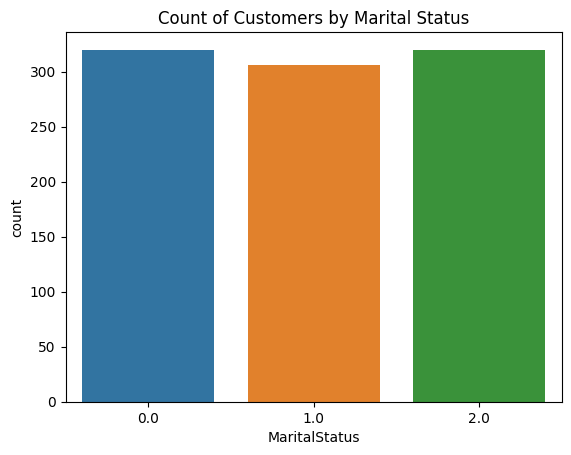

In [27]:
sns.countplot(x='MaritalStatus', data=df_encoded)
plt.title('Count of Customers by Marital Status')
plt.show()

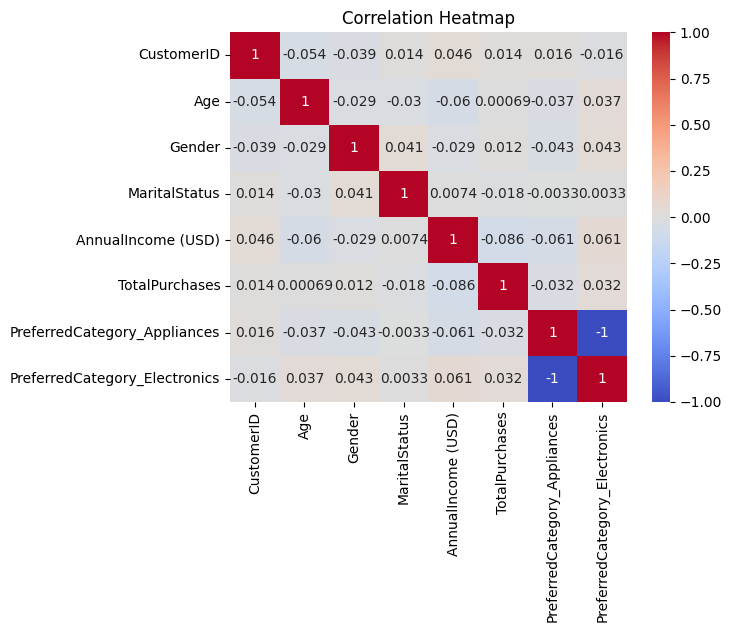

In [28]:
# Correlation heatmap to visualize the correlation between variables
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Deployment Using Dash
After completing the EDA and customer segmentation, DataGenius Analytics will create an interactive dashboard using Dash or Streamlit. This dashboard will allow TechElectro Inc. to explore the customer segments and access visualizations that reveal customer preferences, helping them optimize marketing campaigns and tailor their offerings to specific customer groups.

Project Outcome: The final deliverables will include a Jupyter Notebook containing the EDA process, a report detailing the insights and identified customer segments, and an interactive dashboard deployed for TechElectro Inc. to use in their business decisions. The project's aim is to provide valuable information that will enable TechElectro Inc. to improve customer satisfaction and increase sales through targeted marketing strategies. DataGenius Analytics will also provide recommendations for further analysis and potential areas of improvement.

In [29]:
import dash
from dash import dcc, html
import plotly.express as px

In [30]:
# Step 1: Handle missing values in the original DataFrame
df_encoded.dropna(inplace=True)  # Drop rows with missing values

In [31]:
# Step 2: Feature Scaling (Optional, but it can improve clustering performance)
scaler = StandardScaler()
X = df_encoded.drop(['CustomerID'], axis=1)  # Remove CustomerID for clustering
X_scaled = scaler.fit_transform(X)


In [32]:
# Step 3: Apply K-means clustering algorithm
num_clusters = 5  # You can choose the number of clusters based on your business requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\Syed Muqtasid Ali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Create a Dash app
app = dash.Dash(__name__)

In [34]:
# Define the layout of the app
app.layout = html.Div([
    html.H1("TechElectro Customer Segmentation Dashboard"),
    
    # Dropdown to select the customer segment
    dcc.Dropdown(
        id='cluster-dropdown',
        options=[
            {'label': f'Segment {i}', 'value': i} for i in df_encoded['Cluster'].unique()
        ],
        value=df_encoded['Cluster'].min(),
        style={'width': '50%'}
    ),

    # Scatter plot to visualize the customers in the selected segment
    dcc.Graph(id='scatter-plot'),

    # Bar chart to show average characteristics of the selected segment
    dcc.Graph(id='bar-chart')
])

In [35]:
# Callback to update the scatter plot based on the selected segment
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('cluster-dropdown', 'value')]
)
def update_scatter_plot(selected_segment):
    filtered_df = df_encoded[df_encoded['Cluster'] == selected_segment]
    fig = px.scatter(filtered_df, x='Age', y='AnnualIncome (USD)', color='PreferredCategory',
                     hover_data=['Gender', 'TotalPurchases'], title=f'Segment {selected_segment} - Customer Scatter Plot')
    return fig

In [36]:
# Callback to update the bar chart based on the selected segment
@app.callback(
    dash.dependencies.Output('bar-chart', 'figure'),
    [dash.dependencies.Input('cluster-dropdown', 'value')]
)
def update_bar_chart(selected_segment):
    cluster_summary = df_encoded.groupby('Cluster').mean()
    segment_summary = cluster_summary.loc[selected_segment].drop('CustomerID')
    fig = px.bar(segment_summary, title=f'Segment {selected_segment} - Average Characteristics',
                 labels={'index': 'Characteristics', 'value': 'Average Value'})
    return fig

In [37]:
# import traceback

# # Run the app with debug mode off
# if __name__ == '__main__':
#     app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

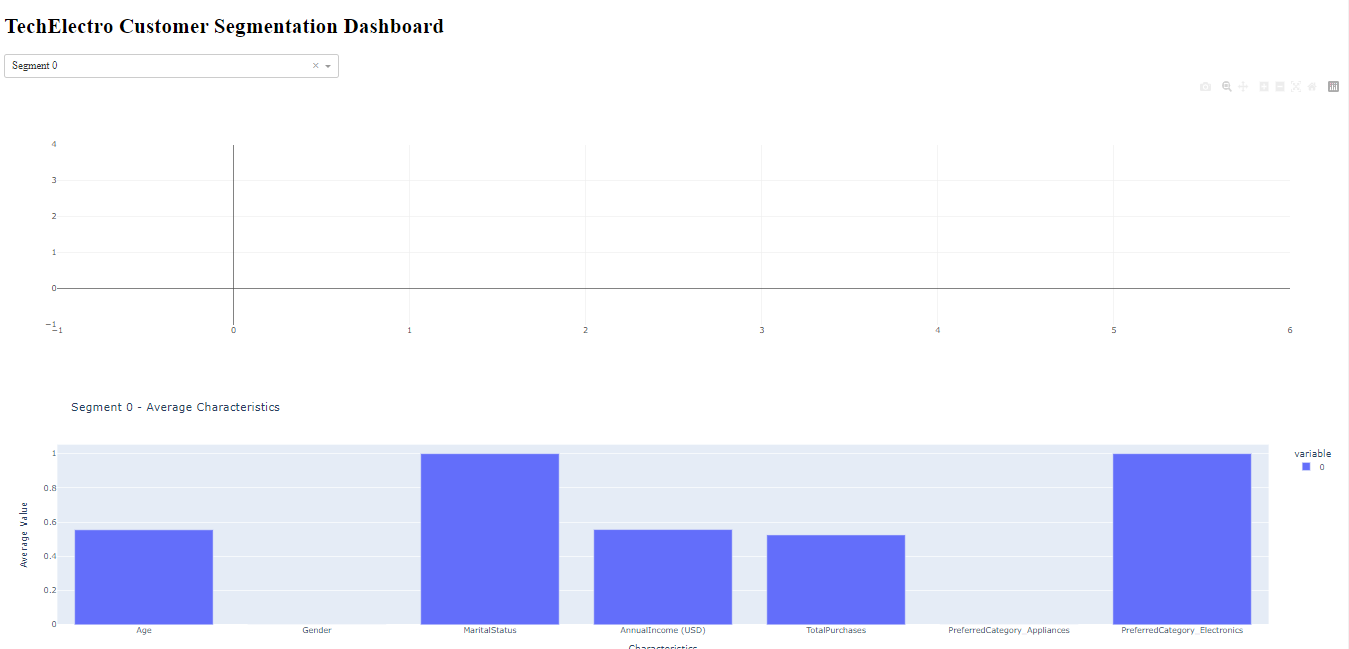

In [38]:
from IPython.display import Image

# Replace 'image_path.jpg' with the actual file path of your image
image_path = 'Capture.PNG'

# Display the image
Image(filename=image_path)


# Summary Report:
# Dataset Creation:

- A synthetic customer dataset was created with 525 rows and 7 columns: CustomerID, Age, Gender, MaritalStatus, AnnualIncome (USD), TotalPurchases, and PreferredCategory.
- The dataset includes random values for customer attributes, such as age, gender, marital status, annual income, total purchases, and preferred product category (Electronics or Appliances).
# Data Preprocessing:

- The dataset was checked for missing values and duplicates.
- Some null values and duplicate rows were intentionally introduced to simulate real-world data scenarios.
- The null values were filled using appropriate imputation strategies, and duplicate rows were removed.
# Exploratory Data Analysis (EDA):

- Various data visualizations and descriptive statistics were used to explore the dataset.
- Insights were derived on customer age distribution, gender distribution, preferred product categories, and more.
- Correlations between customer attributes and purchase behavior were examined.
# Customer Segmentation:

- K-means clustering algorithm was applied to segment customers based on their buying patterns, demographics, and preferences.
- The number of clusters was set to 5 to create distinct customer segments.
- Each customer was assigned a cluster label, indicating the segment they belong to.
# Interactive Dashboard with Dash:

- Dash, a Python web application framework, was utilized to create an interactive dashboard.
- The dashboard allows users to explore customer segments and visualize customer data.
- The dashboard components include a dropdown to select customer segments, a scatter plot to visualize customers in the selected segment, and a bar chart showing average characteristics of the selected segment.
# Deployment and Recommendations:

- The interactive dashboard was deployed and hosted locally on http://127.0.0.1:8050/.
- The dashboard provides TechElectro Inc. valuable insights into customer segments and preferences.
- Recommendations for further analysis and potential areas of improvement were suggested to enhance customer satisfaction and optimize marketing campaigns.
